In [ ]:
!pip install mrsimulator==0.5.0.dev0

---
**NOTE**

This is the developers' version. Please use it with caution.

---

In [ ]:
import mrsimulator
mrsimulator.__version__

## Transition query

Method objects have attribute `transition_query`, which queries spin systems for the transitions that satisfy the query selection criterion. A simplified syntax for transition_query follows

```tranistion_query : {'P': [-1], 'D': [0]}```

where `P` and `D` are a list of p and d-transition symmetry functions which follows

P = [$m_f - m_i$, ...]

D = [$m_f^2 - m_i^2$, ..]

---

### In case of I = 3/2

The table lists the value of transition symmetry function for a given transition $\left|m_i\right\rangle \rightarrow \left|m_f\right\rangle$, in the case of $I=3/2$.

| Initial enery state ($m_i$) | Final energy state ($m_f$)   |   P   |   D  |
| --------------------------- | ---------------------------- | ----- | ---- |
| $\left|3/2\right\rangle$    | $\left|1/2\right\rangle$     | -1    |  -2  |
| $\left|1/2\right\rangle$    | $\left|-1/2\right\rangle$    | -1    |   0  |
| $\left|-1/2\right\rangle$   | $\left|-3/2\right\rangle$    | -1    |   2  |
| $\left|3/2\right\rangle$    | $\left|-1/2\right\rangle$    | -2    |  -2  |
| $\left|1/2\right\rangle$    | $\left|-3/2\right\rangle$    | -2    |   2  |
| $\left|3/2\right\rangle$    | $\left|-3/2\right\rangle$    | -3    |   0  |

---

Read more on transition symmetry functions at Grandinetti *et. al* [1]

1. Grandinetti, P. J., Ash, J. T., Trease, N. M. Symmetry pathways in solid-state NMR, PNMRS 2011 59, 2, 121-196. [DOI: 10.1016/j.pnmrs.2010.11.003](https://doi.org/10.1016/j.pnmrs.2010.11.003)

## 2D simulations 

In [ ]:
import matplotlib.pyplot as plt

import mrsimulator.signal_processing as sp
import mrsimulator.signal_processing.apodization as apo

from mrsimulator import Simulator, SpinSystem, Site
from mrsimulator.methods import Method2D

In [ ]:
def update(method):
    """
        1) Create a single-site spin system,
        2) update the method of the simulator object,
        3) re-run the simulation,
        4) add post simulation processing, and
        5) plot the data
    """

    site = Site(
        isotope="87Rb",
        isotropic_chemical_shift=-7,  # in ppm
        shielding_symmetric={
            "zeta": 110,  # in ppm
            "eta": 0
        },
        quadrupolar={
            "Cq": 3.5e6,  # in Hz
            "eta": 0.3,
            "alpha": 0,  # in rads
            "beta": 70 * 3.1415 / 180,  # in rads
            "gamma": 0,  # in rads
        },
    )
    sys = [SpinSystem(sites=[site])]
    
    # simulator object
    sim = Simulator()
    sim.spin_systems = sys
    sim.methods = [method]
    
    sim.config.integration_volume='hemisphere'
    sim.run()

    data = sim.methods[0].simulation
    
    # plot the simulation
    ax = plt.gca(projection='csdm')
    ax.imshow(data/data.max(), aspect='auto', cmap='gist_ncar_r')
    ax.invert_xaxis()
    ax.invert_yaxis()
    plt.show()

### Triple quantum magic-angle spinning (3QMAS)

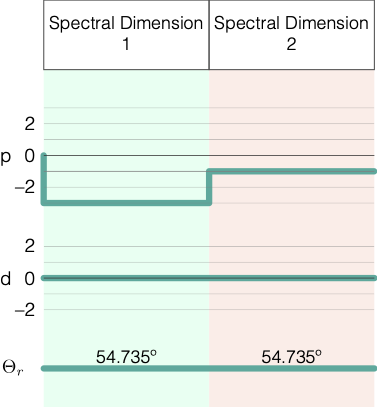

In [ ]:
mqmas = Method2D(
    channels=["87Rb"],
    magnetic_flux_density=9.4,  # in T
    rotor_angle = 54.735 * 3.1415 / 180, # in rads
    spectral_dimensions=[
        {
            "count": 256,
            "spectral_width": 2e4,  # in Hz
            "reference_offset": 4e3,  # in Hz
            "label": "3Q dimension",
            "events": [{
                "transition_query": {'P': [-3], 'D': [0]}
            }]
        },
        # The last spectral dimension block is the direct-dimension
        {
            "count": 256,
            "spectral_width": 2e4,  # in Hz
            "reference_offset": -4e3,  # in Hz
            "label": "MAS dimension",
            "events": [{
                "transition_query": {'P': [-1], 'D': [0]}
            }]
        },
    ],
)

In [ ]:
update(mqmas)

### Satellite transition variable-angle spinning (STVAS)
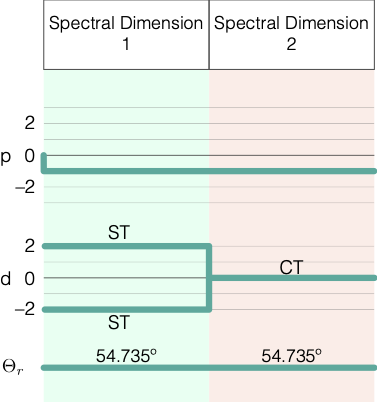

In [ ]:
stmas = Method2D(
    channels=["87Rb"],
    magnetic_flux_density=4.2,  # in T
    rotor_angle = 54.735 * 3.1415 / 180, # in rads
    spectral_dimensions=[
        {
            "count": 256,
            "spectral_width": 6e4,  # in Hz
            "reference_offset": -1e3,  # in Hz
            "label": "Satelline transition dimension",
            "events": [{
                "transition_query": {'P': [-1], 'D': [-2, 2]}
            }]
        },
        # The last spectral dimension block is the direct-dimension
        {
            "count": 256,
            "spectral_width": 5e4,  # in Hz
            "reference_offset": -7e3,  # in Hz
            "label": "MAS dimension",
            "events": [{
                "transition_query": {'P': [-1], 'D': [0]}
            }]
        },
    ],
)

In [ ]:
update(stmas)

### Satellite transition variable-angle spinning (STVAS)

In [ ]:
stvas = Method2D(
    channels=["87Rb"],
    magnetic_flux_density=4.2,  # in T
    rotor_angle = 50 * 3.1415 / 180, # in rads  <--------
    spectral_dimensions=[
        {
            "count": 256,
            "spectral_width": 6e5,  # in Hz
            "reference_offset": 1e4,  # in Hz
            "label": "Satelline transition dimension",
            "events": [{
                "transition_query": {'P': [-1], 'D': [-2, 2]}
            }]
        },
        # The last spectral dimension block is the direct-dimension
        {
            "count": 256,
            "spectral_width": 3e4,  # in Hz
            "reference_offset": -9e3,  # in Hz
            "label": "MAS dimension",
            "events": [{
                "transition_query": {'P': [-1], 'D': [0]}
            }]
        },
    ],
)

In [ ]:
update(stvas)

### A correlation of anisotropies separated through echo refocusing (COASTER)
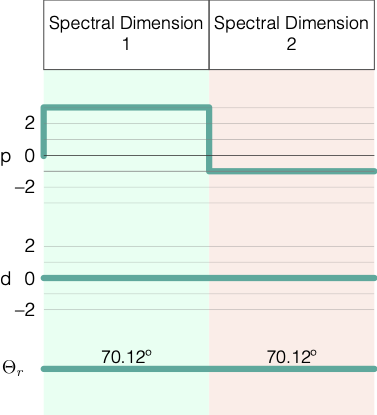

In [ ]:
coaster = Method2D(
    channels=["87Rb"],
    magnetic_flux_density=9.4,  # in T
    rotor_angle = 70.12 * 3.1415 / 180, # in rads
    spectral_dimensions=[
        {
            "count": 256,
            "spectral_width": 4e4,  # in Hz
            "reference_offset": -8e3,  # in Hz
            "label": "3Q dimension",
            "events": [{
                "transition_query": {'P': [3], 'D': [0]}
            }]
        },
        # The last spectral dimension block is the direct-dimension
        {
            "count": 256,
            "spectral_width": 2e4,  # in Hz
            "reference_offset": -3e3,  # in Hz
            "label": "70.12 dimension",
            "events": [{
                "transition_query": {'P': [-1], 'D': [0]}
            }]
        },
    ],
)

In [ ]:
update(coaster)

### Switched angle spinning (SAS)
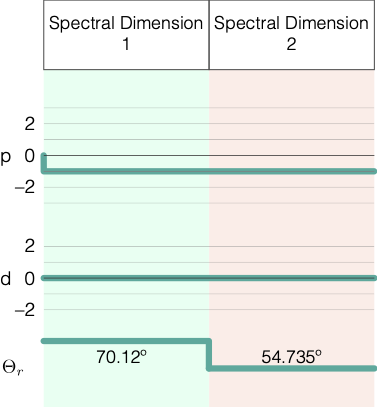

In [ ]:
SAS = Method2D(
    channels=["87Rb"],
    magnetic_flux_density=4.2,  # in T
    spectral_dimensions=[
        {
            "count": 256,
            "spectral_width": 2e4,  # in Hz
            "reference_offset": -5e3,  # in Hz
            "label": "70.12 dimension",
            "events": [{
                "rotor_angle": 70.12 * 3.1415 / 180, # in rads
                "transition_query": {'P': [-1], 'D': [0]}
            }]
        },
        # The last spectral dimension block is the direct-dimension
        {
            "count": 256,
            "spectral_width": 3e4,  # in Hz
            "reference_offset": -7e3,  # in Hz
            "label": "MAS dimension",
            "events": [{
                "rotor_angle": 54.735 * 3.1415 / 180, # in rads
                "transition_query": {'P': [-1], 'D': [0]}
            }]
        },
    ],
)

In [ ]:
update(SAS)

### Dynamic angle spinning (DAS)
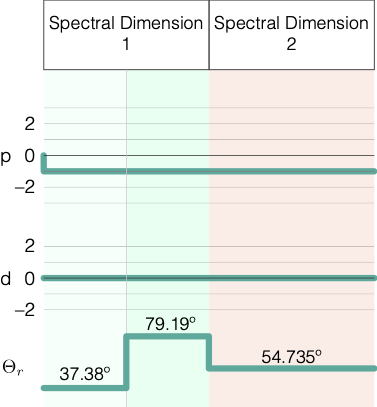

In [ ]:
DAS = Method2D(
    channels=["87Rb"],
    magnetic_flux_density=4.2,  # in T
    spectral_dimensions=[
        {
            "count": 256,
            "spectral_width": 2e4,  # in Hz
            "reference_offset": -5e3,  # in Hz
            "label": "isotropic dimension",
            "events": [
                {
                    "fraction": 0.5,
                    "rotor_angle": 37.38 * 3.1415 / 180, # in rads
                    "transition_query": {'P': [-1], 'D': [0]}
                },
                {
                    "fraction": 0.5,
                    "rotor_angle": 79.19 * 3.1415 / 180, # in rads
                    "transition_query": {'P': [-1], 'D': [0]}
                }
            ]
        },
        # The last spectral dimension block is the direct-dimension
        {
            "count": 256,
            "spectral_width": 3e4,  # in Hz
            "reference_offset": -7e3,  # in Hz
            "label": "MAS dimension",
            "events": [{
                "rotor_angle": 54.735 * 3.1415 / 180, # in rads
                "transition_query": {'P': [-1], 'D': [0]}
            }]
        },
    ],
)

In [ ]:
update(DAS)

# Example

## DAS example for Coesite

In [ ]:
sim = Simulator()

# load the spin systems from the file
filename = "https://raw.githubusercontent.com/DeepanshS/mrsimulator-tutorial/master/resources/coesite.mrsys"
sim.load_spin_systems(filename)

# Create a DAS method
method = Method2D(
    channels=["17O"],
    magnetic_flux_density=11.7,  # in T
    spectral_dimensions=[
        {
            "count": 256,
            "spectral_width": 8e3,  # in Hz
            "reference_offset": 0,  # in Hz
            "label": "DAS isotropic dimension",
            "events": [
                {
                    "fraction": 0.5,
                    "rotor_angle": 37.38 * 3.1415 / 180, # in rads
                    "transition_query": {'P': [-1], 'D': [0]}
                },
                {
                    "fraction": 0.5,
                    "rotor_angle": 79.19 * 3.1415 / 180, # in rads
                    "transition_query": {'P': [-1], 'D': [0]}
                }
            ]
        },
        # The last spectral dimension block is the direct-dimension
        {
            "count": 256,
            "spectral_width": 2e4,  # in Hz
            "reference_offset": 0,  # in Hz
            "label": "MAS dimension",
            "events": [{
                "rotor_angle": 54.735 * 3.1415 / 180, # in rads
                "transition_query": {'P': [-1], 'D': [0]}
            }]
        },
    ],
)

# Assign DAS method to the simulator object
sim.methods = [method]

# run the simulation
sim.run()

# get the simulation data
data = sim.methods[0].simulation
    
# plot the simulation data
ax = plt.gca(projection='csdm')
ax.imshow(data/data.max(), aspect='auto', cmap='gist_ncar_r', vmax=0.1)
ax.invert_xaxis()
ax.invert_yaxis()
plt.show()